In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def diff_eq(y,t,he_loves=-1,she_responds=0.1,she_loves=-1,he_responds=-0.1):
    #dHe/dt = he_loves*He + she_responds*She
    #dShe/dt = she_loves*He + he_responds*She
    #y = [He,She] current position in phase space
    
    A = np.array([[he_loves, she_responds],[she_loves,he_responds]])
    
    dydt = np.dot(A,y)
    
    return dydt #two dimensional vector [dHe/dt,dShe/dt]


def plot_solution(diff_eq, start = [1,2], t_in = np.linspace(-10, 10, 100)):


    fig0, ax0 = plt.subplots(1,1,figsize=(8,8))
    ax0.set_aspect('equal')
    
    
    y_out = odeint(diff_eq, start, t_in) #returns y's and assume t's stay stable
    
    #print(solve.shape, type(solve)) #should print vector of shape y and type will tell type of object

    
    plt.plot(t_in,y_out[:,0]) #[:,0] takes out first column of y...plots Romeo love over time
    plt.plot(t_in,y_out[:,1]) #plots Juliets love over time
    
    plt.grid()
    plt.show()
    
    
    

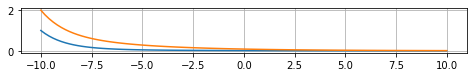

In [3]:
plot_solution(diff_eq) 

add new function plot phaseplane...plotting he against she: he = y[0] she = y[1]
...
try previous parameters (spiral? saddle?)
...
